In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,8)
import seaborn as sns
import numpy as np
import sys
sys.path.append('../')
from parameters import plotting_parameters

In [2]:
relevant_cols = ['Single-Nucleotide Variants',
'CpG',
'Microbiome',
'Hi-C',
'Chip-Seq',
'Genome',
'Epigenomic',
'Metabolomic',
'RNA-Seq',
'DNA methylation',
'Protein expression',
'MiRNA - Seq',
'Copy number',
'Gene expression',
'Copy number variation',
'histopathalogical features',
'Copy number',
'Gene methylation',
'Copy number burden',
'Copy number aberration',
'Copy number alteration',
'Mutation',
'Fluxome',
'QTX',
'Microarray',
'lncRNA',
'Clinical',
'Chromatin accessability',
'Reverse Phase protein',
'Flow cytometry',
'Whole transcriptome',
'Transcripton factor binding sites',
'Open chromatin regions',
'Imaging']

In [3]:
mapping = pd.read_csv('../../data/omics_mapping.csv', sep=';', header=None)
mapping

0                1
0          Single-Nucleotide Variants         Genomics
1                                 CpG      Epigenomics
2                          Microbiome     Metagenomics
3                                Hi-C      Epigenomics
4                            Chip-Seq      Epigenomics
5                              Genome         Genomics
6                          Epigenomic      Epigenomics
7                         Metabolomic     Metabolomics
8                             RNA-Seq  Transcriptomics
9                     DNA methylation      Epigenomics
10                 Protein expression       Proteomics
11                        MiRNA - Seq  Transcriptomics
12                        Copy number         Genomics
13                    Gene expression  Transcriptomics
14              Copy number variation         Genomics
15         histopathalogical features            Other
16                        Copy number         Genomics
17                   Gene methylation      Epigenomics
18                 Copy number burden         Genomics
19             Copy number aberration         Genomics
20             Copy number alteration         Genomics
21                           Mutation         Genomics
22                            Fluxome            Other
23                                QTX            Other
24                         Microarray            Other
25                             lncRNA  Transcriptomics
26                           Clinical            Other
27            Chromatin accessability      Epigenomics
28              Reverse Phase protein       Proteomics
29                     Flow cytometry            Other
30                Whole transcriptome  Transcriptomics
31  Transcripton factor binding sites         Genomics
32             Open chromatin regions      Epigenomics
33                            Imaging            Other

In [4]:
data = pd.read_csv('../../data/ML_AND_Integration_AND_Multiomics.csv')

In [5]:
data.iloc[63]

Unnamed: 0                                                           63
Full name of paper    A multi-omics-based serial deep learning appro...
Doi                                                                NONE
Year                                                               2021
Month                                                                 2
                                            ...                        
OTHER                                                               1.0
single-paper sets                                                   NaN
Updated_DB_TCGA                                                     NaN
Updated_DB_Other                                                    1.0
Updated_DB_exclude                                                  NaN
Name: 63, Length: 206, dtype: object

In [6]:

for col in data.columns:

    if col not in relevant_cols:
        data = data.drop(col, axis=1)

In [7]:
print(mapping[0][0])
print(mapping[1][0])

Single-Nucleotide Variants
Genomics


In [8]:
mapping[1].unique()

array(['Genomics', 'Epigenomics', 'Metagenomics', 'Metabolomics',
       'Transcriptomics', 'Proteomics', 'Other'], dtype=object)

In [9]:
for collected_omic_index in range(len(data.columns)):
    collected_omic_type = data.columns[collected_omic_index]
    
    mapped_type = mapping[mapping[0] == collected_omic_type][1].values[0]
    print('from {}, to {} '.format(collected_omic_type, mapped_type))

from Single-Nucleotide Variants, to Genomics 
from CpG, to Epigenomics 
from Microbiome, to Metagenomics 
from Hi-C, to Epigenomics 
from Chip-Seq, to Epigenomics 
from Genome, to Genomics 
from Epigenomic, to Epigenomics 
from Metabolomic, to Metabolomics 
from RNA-Seq, to Transcriptomics 
from DNA methylation, to Epigenomics 
from Protein expression, to Proteomics 
from MiRNA - Seq, to Transcriptomics 
from Copy number, to Genomics 
from Gene expression, to Transcriptomics 
from Copy number variation, to Genomics 
from histopathalogical features, to Other 
from Gene methylation, to Epigenomics 
from Copy number burden, to Genomics 
from Copy number aberration, to Genomics 
from Copy number alteration, to Genomics 
from Mutation, to Genomics 
from Fluxome, to Other 
from QTX, to Other 
from Microarray, to Other 
from lncRNA, to Transcriptomics 
from Clinical, to Other 
from Chromatin accessability, to Epigenomics 
from Reverse Phase protein, to Proteomics 
from Flow cytometry, to Othe

In [10]:
#Genomic mapping
genomic_list = mapping[mapping[1]== "Genomics"][0].values
genomic_list

array(['Single-Nucleotide Variants', 'Genome', 'Copy number',
       'Copy number variation', 'Copy number', 'Copy number burden',
       'Copy number aberration', 'Copy number alteration', 'Mutation',
       'Transcripton factor binding sites'], dtype=object)

In [11]:
data

Single-Nucleotide Variants  CpG  Microbiome  Hi-C  Chip-Seq  Genome  \
0                          NaN  NaN         NaN   NaN       NaN     1.0   
1                          NaN  NaN         NaN   NaN       NaN     NaN   
2                          NaN  NaN         NaN   NaN       NaN     NaN   
3                          NaN  NaN         NaN   NaN       NaN     NaN   
4                          NaN  NaN         NaN   NaN       NaN     NaN   
..                         ...  ...         ...   ...       ...     ...   
95                         NaN  NaN         NaN   NaN       NaN     NaN   
96                         NaN  NaN         NaN   NaN       NaN     NaN   
97                         NaN  NaN         NaN   NaN       NaN     1.0   
98                         NaN  NaN         NaN   NaN       NaN     NaN   
99                         NaN  NaN         NaN   NaN       NaN     NaN   

    Epigenomic  Metabolomic  RNA-Seq  DNA methylation  ... Microarray  lncRNA  \
0          NaN          NaN      1.0              NaN  ...        NaN     NaN   
1          NaN          NaN      NaN              1.0  ...        NaN     NaN   
2          NaN          NaN      NaN              NaN  ...        NaN     1.0   
3          1.0          1.0      NaN              NaN  ...        NaN     NaN   
4          NaN          NaN      1.0              NaN  ...        NaN     NaN   
..         ...          ...      ...              ...  ...        ...     ...   
95         NaN          NaN      NaN              NaN  ...        NaN     NaN   
96         NaN          NaN      1.0              NaN  ...        NaN     NaN   
97         NaN          NaN      1.0              1.0  ...        NaN     NaN   
98         NaN          NaN      1.0              1.0  ...        NaN     NaN   
99         NaN          NaN      NaN              1.0  ...        NaN     NaN   

    Clinical  Chromatin accessability  Reverse Phase protein Flow cytometry  \
0        NaN                      NaN                    NaN            NaN   
1        NaN                      NaN                    NaN            NaN   
2        NaN                      NaN                    NaN            NaN   
3        NaN                      NaN                    NaN            NaN   
4        NaN                      NaN                    NaN            NaN   
..       ...                      ...                    ...            ...   
95       1.0                      NaN                    NaN            NaN   
96       NaN                      1.0                    NaN            NaN   
97       NaN                      NaN                    NaN            NaN   
98       NaN                      NaN                    NaN            NaN   
99       NaN                      NaN                    NaN            NaN   

    Whole transcriptome  Transcripton factor binding sites  \
0                   NaN                                NaN   
1                   NaN                                NaN   
2                   NaN                                NaN   
3                   NaN                                NaN   
4                   NaN                                NaN   
..                  ...                                ...   
95                  NaN                                NaN   
96                  NaN                                NaN   
97                  NaN                                NaN   
98                  NaN                                NaN   
99                  NaN                                NaN   

    Open chromatin regions  Imaging  
0                      NaN      NaN  
1                      NaN      NaN  
2                      NaN      NaN  
3                      NaN      NaN  
4                      NaN      NaN  
..                     ...      ...  
95                     NaN      NaN  
96                     NaN      NaN  
97                     NaN      NaN  
98                     NaN      NaN  
99                

In [12]:
# genomics
genomics_list = mapping[mapping[1]== "Genomics"][0].values
i = 0
genomics_instances = np.zeros(100)
for index, row in data.iterrows():
    for genomics_type in genomics_list:
        observation = row[genomics_type]
        if observation == 1:
            genomics_instances[i] =1
    i += 1
print(genomics_instances)
print(sum(genomics_instances))

[1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1.]
54.0


In [13]:
# Epigenomics
Epigenomics_list = mapping[mapping[1]== "Epigenomics"][0].values
i = 0
Epigenomics_instances = np.zeros(100)
for index, row in data.iterrows():
    for Epigenomics_type in Epigenomics_list:
        observation = row[Epigenomics_type]
        if observation == 1:
            Epigenomics_instances[i] =1
    i += 1
print(Epigenomics_instances)
print(sum(Epigenomics_instances))

[0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1.]
75.0


In [14]:
# Metagenomics
Metagenomics_list = mapping[mapping[1]== "Metagenomics"][0].values
i = 0
Metagenomics_instances = np.zeros(100)
for index, row in data.iterrows():
    for Metagenomics_type in Metagenomics_list:
        observation = row[Metagenomics_type]
        if observation == 1:
            Metagenomics_instances[i] =1
    i += 1
print(Metagenomics_instances)
print(sum(Metagenomics_instances))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
2.0


In [15]:
# Metabolomics
Metabolomics_list = mapping[mapping[1]== "Metabolomics"][0].values
i = 0
Metabolomics_instances = np.zeros(100)
for index, row in data.iterrows():
    for Metabolomics_type in Metabolomics_list:
        observation = row[Metabolomics_type]
        if observation == 1:
            Metabolomics_instances[i] =1
    i += 1
print(Metabolomics_instances)
print(sum(Metabolomics_instances))

[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0.]
6.0


In [16]:
# Transcriptomics
Transcriptomics_list = mapping[mapping[1]== "Transcriptomics"][0].values
i = 0
Transcriptomics_instances = np.zeros(100)
for index, row in data.iterrows():
    for Transcriptomics_type in Transcriptomics_list:
        observation = row[Transcriptomics_type]
        if observation == 1:
            Transcriptomics_instances[i] =1
    i += 1
print(Transcriptomics_instances)
print(sum(Transcriptomics_instances))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
96.0


In [17]:
# Proteomics
Proteomics_list = mapping[mapping[1]== "Proteomics"][0].values
i = 0
Proteomics_instances = np.zeros(100)
for index, row in data.iterrows():
    for Proteomics_type in Proteomics_list:
        observation = row[Proteomics_type]
        if observation == 1:
            Proteomics_instances[i] =1
    i += 1
print(Proteomics_instances)
print(sum(Proteomics_instances))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0.]
3.0


In [18]:
# Other
Other_list = mapping[mapping[1]== "Other"][0].values
i = 0
Other_instances = np.zeros(100)
for index, row in data.iterrows():
    for Other_type in Other_list:
        observation = row[Other_type]
        if observation == 1:
            Other_instances[i] =1
    i += 1
print(Other_instances)
print(sum(Other_instances))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0.]
19.0


In [19]:
summary_omic_data = pd.DataFrame()
summary_omic_data['Genomics'] = genomics_instances
summary_omic_data['Epigenomics'] = Epigenomics_instances
summary_omic_data['Transcriptomics'] = Transcriptomics_instances
summary_omic_data['Other'] = Other_instances
summary_omic_data['Proteomics'] = Proteomics_instances
summary_omic_data['Metabolomics'] = Metabolomics_instances
summary_omic_data['Metagenomics'] = Metagenomics_instances

In [20]:
summary_omic_data.head()

Genomics  Epigenomics  Transcriptomics  Other  Proteomics  Metabolomics  \
0       1.0          0.0              1.0    1.0         0.0           0.0   
1       0.0          1.0              1.0    0.0         0.0           0.0   
2       0.0          0.0              1.0    0.0         0.0           0.0   
3       0.0          1.0              1.0    0.0         0.0           1.0   
4       0.0          1.0              1.0    0.0         0.0           0.0   

   Metagenomics  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [21]:
hist_data = summary_omic_data.sum(axis=0)

In [22]:
sorted_data = hist_data.sort_values(ascending=False)

In [23]:
hist_data

Genomics           54.0
Epigenomics        75.0
Transcriptomics    96.0
Other              19.0
Proteomics          3.0
Metabolomics        6.0
Metagenomics        2.0
dtype: float64

Text(0.5, 1.0, 'Omics types used in 100 papers')

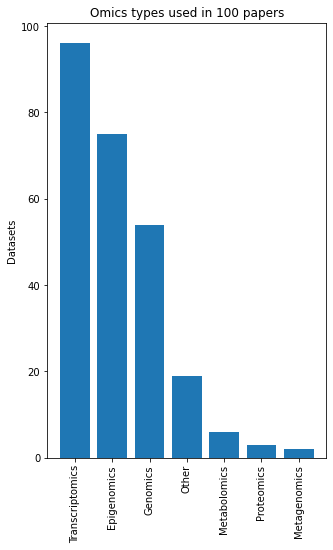

In [24]:
plt.bar(x = sorted_data.index, height=sorted_data, )
plt.xticks(rotation=90)
plt.ylabel('Datasets')
plt.title('Omics types used in 100 papers')

In [25]:
omics_per_hist_data = summary_omic_data.sum(axis=1)

In [26]:
omics_per_hist_data

0     3.0
1     2.0
2     1.0
3     3.0
4     2.0
     ... 
95    3.0
96    2.0
97    3.0
98    2.0
99    3.0
Length: 100, dtype: float64

In [27]:
omics_per_hist_data

0     3.0
1     2.0
2     1.0
3     3.0
4     2.0
     ... 
95    3.0
96    2.0
97    3.0
98    2.0
99    3.0
Length: 100, dtype: float64

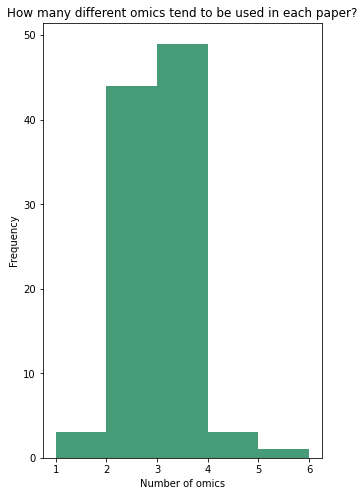

In [28]:
plt.hist(omics_per_hist_data, bins = [1,2,3,4,5,6,], fc = plotting_parameters.green)
plt.title('How many different omics tend to be used in each paper?')
plt.xlabel('Number of omics')
plt.ylabel('Frequency')
plt.savefig("../../figures/number_omics.png", dpi=400, bbox_inches = "tight")
plt.savefig("../../figures/number_omics.pdf", dpi=400, bbox_inches = "tight")

In [29]:
summary_omic_data.to_csv("../../data/omics_frequencies_summary.csv")